In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(
    low=-90.000
    , high=90.000
    , size=1500
)
lngs = np.random.uniform(
    low=-180.000
    , high=180.000
    , size=1500
)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(
        coordinate[0]
        , coordinate[1]
    ).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
len(cities)

621

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | praya
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mitu
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | pathein
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | filadelfia
Processing Record 15 of Set 1 | jahrom
City not found. Skipping...
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | biak
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | sedkyrkeshch
Processing Record 21 of Set 1 | tengushevo
Processing Record 22 of Set 1 | tortoli
Processing Record 23 o

Processing Record 38 of Set 4 | poum
Processing Record 39 of Set 4 | junin
Processing Record 40 of Set 4 | airai
Processing Record 41 of Set 4 | amahai
Processing Record 42 of Set 4 | kunashak
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | roma
Processing Record 47 of Set 4 | arlit
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | korla
Processing Record 50 of Set 4 | zhangye
Processing Record 1 of Set 5 | rincon
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | cidreira
Processing Record 4 of Set 5 | twin falls
Processing Record 5 of Set 5 | hokitika
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | sangar
Processing Record 8 of Set 5 | bethel
Processing Record 9 of Set 5 | wau
Processing Record 10 of Set 5 | te anau
Processing Record 11 of Set 5 | deputatskiy
Process

Processing Record 28 of Set 8 | narsaq
Processing Record 29 of Set 8 | de aar
Processing Record 30 of Set 8 | tarko-sale
Processing Record 31 of Set 8 | gornyak
Processing Record 32 of Set 8 | naples
Processing Record 33 of Set 8 | leninsk
Processing Record 34 of Set 8 | verkhnevilyuysk
Processing Record 35 of Set 8 | gizo
Processing Record 36 of Set 8 | belaya gora
Processing Record 37 of Set 8 | la crosse
Processing Record 38 of Set 8 | saint-joseph
Processing Record 39 of Set 8 | zambezi
Processing Record 40 of Set 8 | mandalgovi
Processing Record 41 of Set 8 | sanming
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | sao joao da barra
Processing Record 44 of Set 8 | winslow
Processing Record 45 of Set 8 | pacifica
Processing Record 46 of Set 8 | kaitangata
Processing Record 47 of Set 8 | nantucket
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8 | sao francisco de paula
Processing Record 50 of Set 8 | kuala terengganu
Processing Rec

City not found. Skipping...
Processing Record 18 of Set 12 | santa cruz del sur
Processing Record 19 of Set 12 | honningsvag
Processing Record 20 of Set 12 | ust-omchug
Processing Record 21 of Set 12 | capitan bado
Processing Record 22 of Set 12 | los llanos de aridane
Processing Record 23 of Set 12 | riyadh
Processing Record 24 of Set 12 | wasilla
Processing Record 25 of Set 12 | hofn
Processing Record 26 of Set 12 | glencoe
Processing Record 27 of Set 12 | marquette
Processing Record 28 of Set 12 | marienburg
Processing Record 29 of Set 12 | komsomolskiy
Processing Record 30 of Set 12 | dalvik
Processing Record 31 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 32 of Set 12 | mercedes
Processing Record 33 of Set 12 | williamsburg
Processing Record 34 of Set 12 | atasu
Processing Record 35 of Set 12 | havre-saint-pierre
Processing Record 36 of Set 12 | illapel
Processing Record 37 of Set 12 | santa cruz
Processing Record 38 of Set 12 | tillabery
City not found. Sk

In [7]:
print(len(city_data))

574


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.79,-152.41,51.80,87,90,10.29,US,2020-06-20 20:36:07
1,Sao Filipe,14.90,-24.50,74.57,81,16,6.71,CV,2020-06-20 20:40:40
2,Praya,14.92,-23.51,73.18,83,20,12.73,CV,2020-06-20 20:40:40
3,Punta Arenas,-53.15,-70.92,39.20,80,75,5.82,CL,2020-06-20 20:40:40
4,Mitu,1.20,-70.17,79.11,93,85,3.31,CO,2020-06-20 20:36:06
5,Barrow,71.29,-156.79,33.80,80,90,4.70,US,2020-06-20 20:40:40
6,Jamestown,42.10,-79.24,80.01,57,20,6.93,US,2020-06-20 20:37:24
7,Pathein,16.78,94.73,80.01,88,100,5.53,MM,2020-06-20 20:40:41
8,New Norfolk,-42.78,147.06,44.01,92,100,1.43,AU,2020-06-20 20:36:02
9,Bluff,-46.60,168.33,39.00,83,19,3.00,NZ,2020-06-20 20:40:41


In [9]:
new_column_order = [
    'City'
    , 'Country'
    , 'Date'
    , 'Lat'
    , 'Lng'
    , 'Max Temp'
    , 'Humidity'
    , 'Cloudiness'
    , 'Wind Speed'
]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2020-06-20 20:36:07,57.79,-152.41,51.80,87,90,10.29
1,Sao Filipe,CV,2020-06-20 20:40:40,14.90,-24.50,74.57,81,16,6.71
2,Praya,CV,2020-06-20 20:40:40,14.92,-23.51,73.18,83,20,12.73
3,Punta Arenas,CL,2020-06-20 20:40:40,-53.15,-70.92,39.20,80,75,5.82
4,Mitu,CO,2020-06-20 20:36:06,1.20,-70.17,79.11,93,85,3.31
5,Barrow,US,2020-06-20 20:40:40,71.29,-156.79,33.80,80,90,4.70
6,Jamestown,US,2020-06-20 20:37:24,42.10,-79.24,80.01,57,20,6.93
7,Pathein,MM,2020-06-20 20:40:41,16.78,94.73,80.01,88,100,5.53
8,New Norfolk,AU,2020-06-20 20:36:02,-42.78,147.06,44.01,92,100,1.43
9,Bluff,NZ,2020-06-20 20:40:41,-46.60,168.33,39.00,83,19,3.00


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

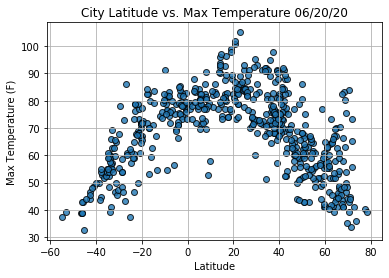

In [12]:
import matplotlib.pyplot as plt
import time

# Get today's date in seconds.
today = time.time()
today
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats
    , max_temps
    , edgecolor="black"
    , linewidths=1
    , marker="o"
    , alpha=0.8
    , label="Cities"
)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

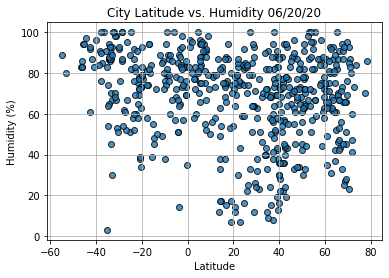

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

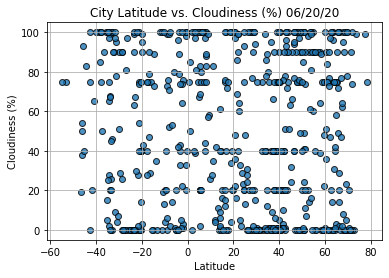

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

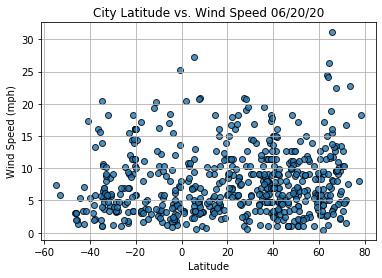

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

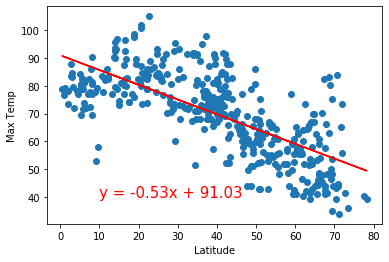

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

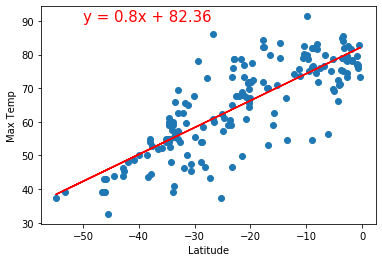

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

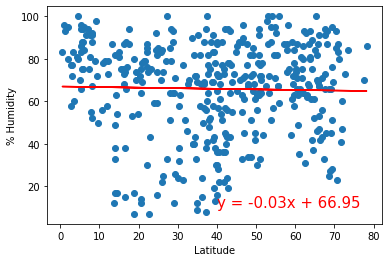

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values
   , y_values
   , 'Linear Regression on the Northern Hemisphere \n for % Humidity'
   , '% Humidity',(40,10)
)

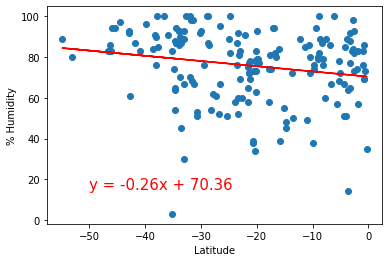

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for % Humidity'
    , '% Humidity',(-50,15)
)

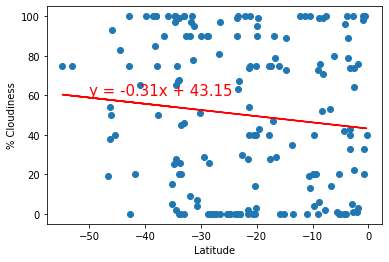

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'
    , '% Cloudiness',(-50,60)
)

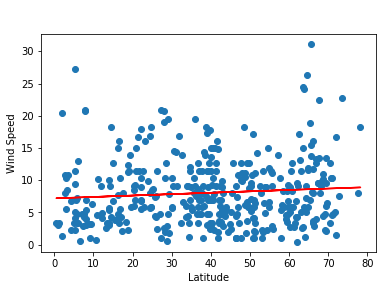

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Northern Hemisphere \n for Wind Speed'
    , 'Wind Speed',(40,35)
)

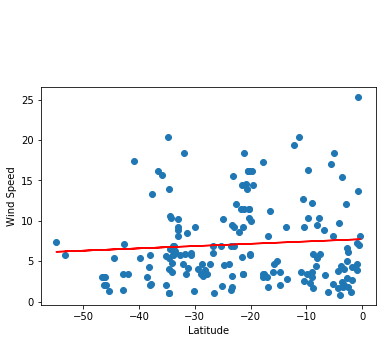

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values
    , y_values
    , 'Linear Regression on the Southern Hemisphere \n for Wind Speed'
    , 'Wind Speed',(-50,35)
)